In [5]:
from collections import deque
import numpy as np

num_node = 9
queue = deque()
dict1 = {}
distance = 0
min_distance = np.inf

def lcm(x, y):
    def gcd(a, b):
        while b:
            a, b = b, a % b
        return a
    return x * y // gcd(x, y)

def get_neighbors(node):
    """获取相邻节点"""
    global num_node
    neighbors = []
    for i in range(1, num_node+1):
        if abs(node - i) <= 23:
            neighbors.append(i)
    return neighbors

def dfs(i,cnt):
    global distance
    global min_distance
    global dict1
    global queue
    global num_node
    # 剪枝
    if (cnt < num_node and dict1[1] == 1):
        return
    if (distance > min_distance):
        return
    
    # 递归终止条件
    if (cnt == num_node and i == 1):
        if (distance < min_distance):
            min_distance = distance
            print("最短距离:",min_distance)
            for q in queue:
                print(q, end=' ')
            print()
        return  

    neg = get_neighbors(i) 
    for j in neg:
        if dict1[j] == 0:
            dict1[j] = 1
            distance += lcm(i, j)
            queue.append(j)
            dfs(j,cnt+1)
            distance -= lcm(i, j)
            dict1[j] = 0
            queue.pop()
    return
        



if __name__ == '__main__':
    num_node = 23
    for i in range(1, num_node+1):
        dict1[i] =0
    dfs(1,0)



最短距离: 4071
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 1 
最短距离: 3848
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 22 21 23 1 
最短距离: 3844
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 21 22 20 23 1 
最短距离: 3661
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 20 22 19 21 23 1 
最短距离: 3659
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 20 22 21 19 23 1 
最短距离: 3592
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 21 19 20 22 23 1 
最短距离: 3584
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 21 19 22 20 23 1 
最短距离: 3582
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 21 20 22 19 23 1 
最短距离: 3385
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 19 20 22 18 21 23 1 
最短距离: 3381
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 19 21 18 22 20 23 1 
最短距离: 3375
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 20 22 18 21 19 23 1 
最短距离: 3373
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 21 18 22 20 19 23 1 
最短距离: 3371
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 19 17 21 18 22 20 23 1 
最短距离: 3359
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 19 20 22 18 21 1

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# @Time    : 2019/9/11
# @Author  : github.com/guofei9987

import numpy as np


class ACA_TSP:
    def __init__(self, func, n_dim,
                 size_pop=10, max_iter=20,
                 distance_matrix=None,
                 alpha=1, beta=2, rho=0.1,
                 ):
        self.func = func
        self.n_dim = n_dim  # 城市数量
        self.size_pop = size_pop  # 蚂蚁数量
        self.max_iter = max_iter  # 迭代次数
        self.alpha = alpha  # 信息素重要程度
        self.beta = beta  # 适应度的重要程度
        self.rho = rho  # 信息素挥发速度

        self.prob_matrix_distance = 1 / \
            (distance_matrix + 1e-10 * np.eye(n_dim, n_dim))  # 避免除零错误

        self.Tau = np.ones((n_dim, n_dim))  # 信息素矩阵，每次迭代都会更新
        self.Table = np.zeros((size_pop, n_dim)).astype(np.int64)  # 某一代每个蚂蚁的爬行路径
        self.y = None  # 某一代每个蚂蚁的爬行总距离
        self.generation_best_X, self.generation_best_Y = [], []  # 记录各代的最佳情况
        self.x_best_history, self.y_best_history = self.generation_best_X, self.generation_best_Y  # 历史原因，为了保持统一
        self.best_x, self.best_y = None, None

    def run(self, max_iter=None):
        self.max_iter = max_iter or self.max_iter
        for i in range(self.max_iter):  # 对每次迭代
            prob_matrix = (self.Tau ** self.alpha) * \
                (self.prob_matrix_distance) ** self.beta  # 转移概率，无须归一化。
            for j in range(self.size_pop):  # 对每个蚂蚁
                self.Table[j, 0] = 0  # start point，其实可以随机，但没什么区别
                for k in range(self.n_dim - 1):  # 蚂蚁到达的每个节点
                    taboo_set = set(self.Table[j, :k + 1])  # 已经经过的点和当前点，不能再次经过
                    allow_list = list(
                        set(range(self.n_dim)) - taboo_set)  # 在这些点中做选择
                    prob = prob_matrix[self.Table[j, k], allow_list]
                    # prob = prob / prob.sum()  # 概率归一化
                    prob += 1e-10  # 避免为0
                    # prob = (prob / (prob.sum()+1e-10))  # 概率归一化
                    prob = prob/prob.sum()
                    next_point = np.random.choice(
                        allow_list, size=1, p=prob)[0]
                    self.Table[j, k + 1] = next_point

            # 计算距离
            y = np.array([self.func(i) for i in self.Table])

            # 顺便记录历史最好情况
            index_best = y.argmin()
            x_best, y_best = self.Table[index_best,
                                        :].copy(), y[index_best].copy()
            self.generation_best_X.append(x_best)
            self.generation_best_Y.append(y_best)

            # 计算需要新涂抹的信息素
            delta_tau = np.zeros((self.n_dim, self.n_dim))
            for j in range(self.size_pop):  # 每个蚂蚁
                for k in range(self.n_dim - 1):  # 每个节点
                    # 蚂蚁从n1节点爬到n2节点
                    n1, n2 = self.Table[j, k], self.Table[j, k + 1]
                    delta_tau[n1, n2] += 1 / y[j]  # 涂抹的信息素
                n1, n2 = self.Table[j, self.n_dim -
                                    1], self.Table[j, 0]  # 蚂蚁从最后一个节点爬回到第一个节点
                delta_tau[n1, n2] += 1 / y[j]  # 涂抹信息素

            # 信息素飘散+信息素涂抹
            self.Tau = (1 - self.rho) * self.Tau + delta_tau

        best_generation = np.array(self.generation_best_Y).argmin()
        self.best_x = self.generation_best_X[best_generation]
        self.best_y = self.generation_best_Y[best_generation]
        return self.best_x, self.best_y

    fit = run

#### 蚁群算法

In [23]:
# from sko.ACA import ACA_TSP
import numpy as np

# 定义城市图的大小
num_cities = 10

# 生成城市之间的距离矩阵
distances = np.zeros((num_cities, num_cities))

for i in range(num_cities):
    for j in range(i + 1, num_cities):
        if abs(i - j) > 23:
            distances[i][j] = distances[j][i] = np.inf
        else:
            distances[i][j] = distances[j][i] = np.lcm(i + 1, j + 1)

# 定义蚁群算法
aca = ACA_TSP(func=lambda x: np.sum([distances[x[i % num_cities], x[(i + 1) % num_cities]] for i in range(num_cities)]),
          n_dim=num_cities,
          size_pop=50,
          max_iter=100,
          distance_matrix=distances)

# 运行蚁群算法
best_path, best_distance = aca.run()
print('best path:', best_path,"\n" 'best_distance:', best_distance)


best path: [0 2 8 5 3 7 1 9 4 6] 
best_distance: 120.0


In [24]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib qt5

fig, ax = plt.subplots(1, 1)
# best_points_ = np.concatenate([best_path, [best_path[0]]])
# best_points_coordinate = points_coordinate[best_points_, :]
# ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
plt.plot(pd.DataFrame(aca.y_best_history).cummin(), 'b-')
plt.xlabel('iteration')
plt.ylabel('distance')
plt.title('ACA for TSP')
# print(aca.y_best_history)
# pd.DataFrame(aca.y_best_history).cummin().plot(ax=ax)
plt.show()

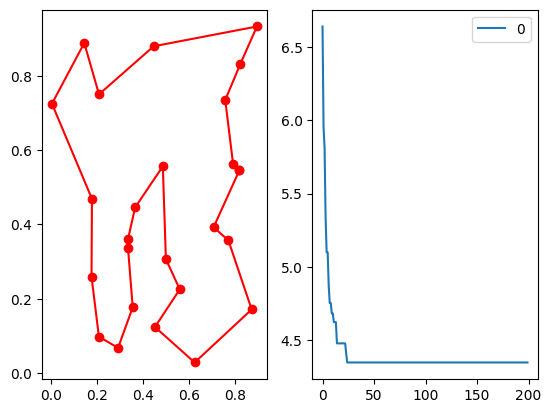

In [1]:
from sko.ACA import ACA_TSP
import numpy as np
from scipy import spatial
import pandas as pd
import matplotlib.pyplot as plt

num_points = 25

points_coordinate = np.random.rand(
    num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(
    points_coordinate, points_coordinate, metric='euclidean')


def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


# %% Do ACA

aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
              size_pop=50, max_iter=200,
              distance_matrix=distance_matrix)

best_x, best_y = aca.run()

# %% Plot
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_x, [best_x[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
pd.DataFrame(aca.y_best_history).cummin().plot(ax=ax[1])
plt.show()


基于穷举法之深度优先搜索策略求得的旅行商最短路径为：
0—>2—>1—>0
总路径长为：11.0



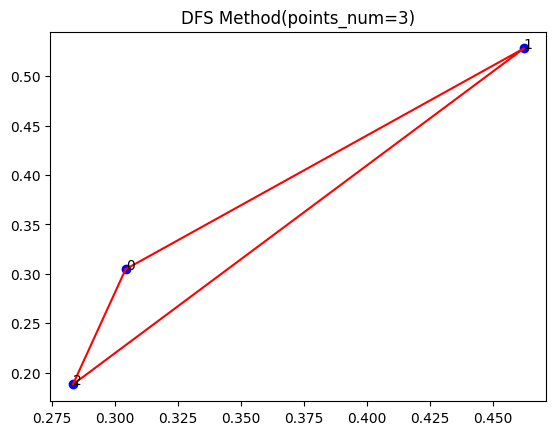

执行时间：[0.0001025460078381002]/n[0.00014174400712363422]

基于穷举法之深度优先搜索策略求得的旅行商最短路径为：
0—>3—>1—>2—>0
总路径长为：17.0



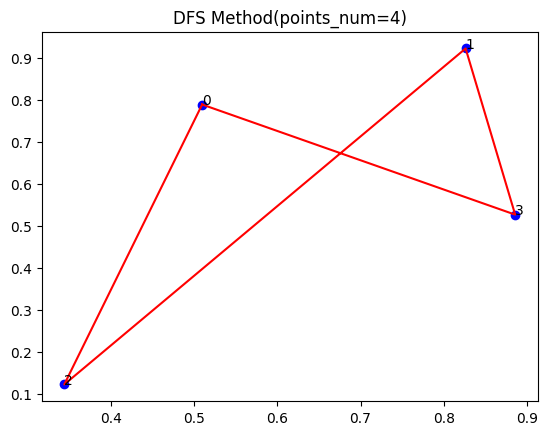

执行时间：[0.0001025460078381002, 0.00017960599507205188]/n[0.00014174400712363422, 0.0002683660131879151]


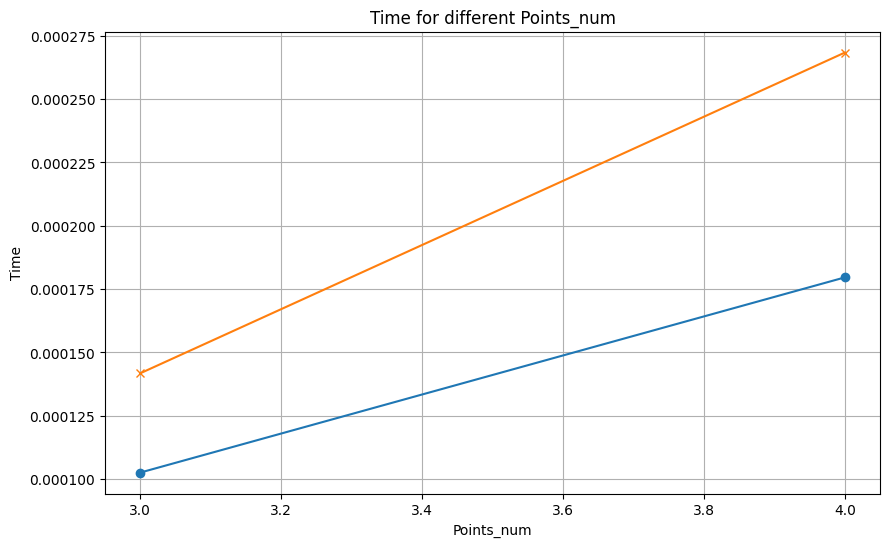

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# @Time    : 2019/9/11
# @Author  : github.com/guofei9987

import numpy as np
from tqdm import tqdm


class ACA_TSP:
    def __init__(self, func, n_dim,
                 size_pop=10, max_iter=20,
                 distance_matrix=None,
                 alpha=1, beta=2, rho=0.1,
                 ):
        self.func = func
        self.n_dim = n_dim  # 城市数量
        self.size_pop = size_pop  # 蚂蚁数量
        self.max_iter = max_iter  # 迭代次数
        self.alpha = alpha  # 信息素重要程度
        self.beta = beta  # 适应度的重要程度
        self.rho = rho  # 信息素挥发速度

        self.prob_matrix_distance = 1 / \
            (distance_matrix + 1e-10 * np.eye(n_dim, n_dim))  # 避免除零错误

        self.Tau = np.ones((n_dim, n_dim))  # 信息素矩阵，每次迭代都会更新
        self.Table = np.zeros((size_pop, n_dim)).astype(np.int)  # 某一代每个蚂蚁的爬行路径
        self.y = None  # 某一代每个蚂蚁的爬行总距离
        self.generation_best_X, self.generation_best_Y = [], []  # 记录各代的最佳情况
        self.x_best_history, self.y_best_history = self.generation_best_X, self.generation_best_Y  # 历史原因，为了保持统一
        self.best_x, self.best_y = None, None

    def run(self, max_iter=None):
        self.max_iter = max_iter or self.max_iter
        for i in tqdm(range(self.max_iter)):  # 对每次迭代
            prob_matrix = (self.Tau ** self.alpha) * \
                (self.prob_matrix_distance) ** self.beta  # 转移概率，无须归一化。
            for j in range(self.size_pop):  # 对每个蚂蚁
                self.Table[j, 0] = 0  # start point，其实可以随机，但没什么区别
                for k in range(self.n_dim - 1):  # 蚂蚁到达的每个节点
                    taboo_set = set(self.Table[j, :k + 1])  # 已经经过的点和当前点，不能再次经过
                    allow_list = list(
                        set(range(self.n_dim)) - taboo_set)  # 在这些点中做选择
                    prob = prob_matrix[self.Table[j, k], allow_list]
                    # prob = prob / prob.sum()  # 概率归一化
                    prob = prob + 1e-10
                    prob = prob/prob.sum()
                    next_point = np.random.choice(
                        allow_list, size=1, p=prob)[0]
                    self.Table[j, k + 1] = next_point

            # 计算距离
            y = np.array([self.func(i) for i in self.Table])

            # 顺便记录历史最好情况
            index_best = y.argmin()
            x_best, y_best = self.Table[index_best,
                                        :].copy(), y[index_best].copy()
            self.generation_best_X.append(x_best)
            self.generation_best_Y.append(y_best)

            # 计算需要新涂抹的信息素
            delta_tau = np.zeros((self.n_dim, self.n_dim))
            for j in range(self.size_pop):  # 每个蚂蚁
                for k in range(self.n_dim - 1):  # 每个节点
                    # 蚂蚁从n1节点爬到n2节点
                    n1, n2 = self.Table[j, k], self.Table[j, k + 1]
                    delta_tau[n1, n2] += 1 / y[j]  # 涂抹的信息素
                n1, n2 = self.Table[j, self.n_dim -
                                    1], self.Table[j, 0]  # 蚂蚁从最后一个节点爬回到第一个节点
                delta_tau[n1, n2] += 1 / y[j]  # 涂抹信息素

            # 信息素飘散+信息素涂抹
            self.Tau = (1 - self.rho) * self.Tau + delta_tau

        best_generation = np.array(self.generation_best_Y).argmin()
        self.best_x = self.generation_best_X[best_generation]
        self.best_y = self.generation_best_Y[best_generation]
        return self.best_x, self.best_y

    fit = run

# from sko.ACA import ACA_TSP


# 定义城市图的大小
num_cities = 2024

# 生成城市之间的距离矩阵
distances = np.zeros((num_cities, num_cities))

for i in range(num_cities):
    for j in range(i, num_cities):
        if abs(i - j) > 23:
            distances[i][j] = distances[j][i] = np.inf
        else:
            distances[i][j] = distances[j][i] = np.lcm(i + 1, j + 1)

print(distances)

# 定义蚁群算法
aca = ACA_TSP(func=lambda x: np.sum([distances[x[i % num_cities], x[(i + 1) % num_cities]] for i in range(num_cities)]),
              n_dim=num_cities,
              size_pop=50,
              max_iter=1,
              distance_matrix=distances)

# 运行蚁群算法
best_path, best_distance = aca.run()
print(best_path)
print(best_distance)

# np.save('best_path.npy', (best_path))
# np.save('best_distance.npy', (best_distance))